In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
from collections import defaultdict
from sklearn.metrics import adjusted_rand_score
from scipy.stats import rankdata
import itertools

In [3]:
from pygraphs.cluster import KKMeans
from pygraphs.graphs.generator import StochasticBlockModel, RubanovModel
from pygraphs.measure import *
from pygraphs.measure.kernel import Kernel
from pygraphs.measure import kernels, scaler
from pygraphs.scenario import plot_results, d3_colors, ParallelByGraphs
from pygraphs.scorer import rand_index

ERROR:root:logComm, 0.00, graph 0: Input contains NaN, infinity or a value too large for dtype('float64').
ERROR:root:logComm, 37.00, graph 0: loop of ufunc does not support argument 0 of type NoneType which has no callable log method
ERROR:root:logComm, 74.50, graph 0: loop of ufunc does not support argument 0 of type NoneType which has no callable log method
ERROR:root:logComm, inf, graph 0: loop of ufunc does not support argument 0 of type NoneType which has no callable log method
ERROR:root:logComm, 0.00, graph 1: Input contains NaN, infinity or a value too large for dtype('float64').
ERROR:root:logComm, 37.00, graph 1: loop of ufunc does not support argument 0 of type NoneType which has no callable log method
ERROR:root:logComm, 74.50, graph 1: loop of ufunc does not support argument 0 of type NoneType which has no callable log method
ERROR:root:logComm, inf, graph 1: loop of ufunc does not support argument 0 of type NoneType which has no callable log method
ERROR:root:logComm, 0.

KeyboardInterrupt: 

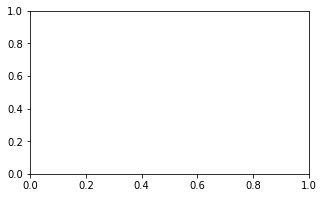

In [4]:
fig, ax = plt.subplots(1, figsize=(5, 3))
graphs, _ = StochasticBlockModel(100, 2, p_in=0.3, p_out=0.15).generate_graphs(100)
classic_plot = ParallelByGraphs(rand_index, np.linspace(0, 1, 151), progressbar=True, verbose=True)
results = classic_plot.perform(KKMeans, logComm_H, graphs, 2, n_jobs=1)
plot_results(ax, [('logComm', *results)], ylim=(-0.1, 1.1))

In [ ]:
fig, ax = plt.subplots(1, figsize=(5, 3))
graphs, _ = StochasticBlockModel(100, 2, p_in=0.3, p_out=0.15).generate_graphs(100)
classic_plot = ParallelByGraphs(rand_index, np.linspace(0, 1, 151), progressbar=True, verbose=True)
results = classic_plot.perform(KKMeans, SCCT_H, graphs, 2, n_jobs=1)
plot_results(ax, [('SCCT', *results)], ylim=(-0.1, 1.1))

In [ ]:
fig, ax = plt.subplots(1, figsize=(5, 3))
graphs, _ = StochasticBlockModel(100, 2, p_in=0.3, p_out=0.15).generate_graphs(100)
classic_plot = ParallelByGraphs(rand_index, np.linspace(0, 1, 151), progressbar=True, verbose=True)
results = classic_plot.perform(KKMeans, logHeat_H, graphs, 2, n_jobs=1)
plot_results(ax, [('logHeat', *results)], ylim=(-0.1, 1.1))

In [ ]:
class logComm_SCCT(Kernel):
    name, default_scaler = 'logComm_SCCT', scaler.Linear
    
    def __init__(self, A):
        super().__init__(A)
        self.logComm = logComm_H(A)
        self.logComm_param = 0.05
        self.SCCT = SCCT_H(A)
        self.SCCT_param = 0.74
    
    def get_K(self, param):
        logComm_result = self.logComm.get_K(self.logComm_param)
        SCCT_result = self.SCCT.get_K(self.SCCT_param)
        return (1 - param) * logComm_result + param * SCCT_result

In [ ]:
fig, ax = plt.subplots(1, figsize=(5, 3))
graphs, _ = StochasticBlockModel(100, 2, p_in=0.3, p_out=0.15).generate_graphs(100)
classic_plot = ParallelByGraphs(rand_index, np.linspace(0, 1, 151), progressbar=True, verbose=True)
results = classic_plot.perform(KKMeans, logComm_SCCT, graphs, 2, n_jobs=1)
plot_results(ax, [('logComm_SCCT', *results)], ylim=(0.8, 1.0))

In [ ]:
class logComm_logHeat(Kernel):
    name, default_scaler = 'logComm_logHeat', scaler.Linear
    
    def __init__(self, A):
        super().__init__(A)
        self.logComm = logComm_H(A)
        self.logComm_param = 0.05
        self.logHeat = logHeat_H(A)
        self.logHeat_param = 0.1
    
    def get_K(self, param):
        logComm_result = self.logComm.get_K(self.logComm_param)
        logHeat_result = self.logHeat.get_K(self.logHeat_param)
        return (1 - param) * logComm_result + param * logHeat_result

In [ ]:
fig, ax = plt.subplots(1, figsize=(5, 3))
graphs, _ = StochasticBlockModel(100, 2, p_in=0.3, p_out=0.15).generate_graphs(100)
classic_plot = ParallelByGraphs(rand_index, np.linspace(0, 1, 151), progressbar=True, verbose=True)
results = classic_plot.perform(KKMeans, logComm_logHeat, graphs, 2, n_jobs=1)
plot_results(ax, [('logComm_logHeat', *results)], ylim=(0.8, 1.0))